In [32]:
# Cargar las librerias necesrias
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# from sklearn.linear_model import LinearRegression -> Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
# Carga del archivo csv
Datos = pd.read_csv('./heart_cleveland_upload.csv')

In [34]:
Datos.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [35]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

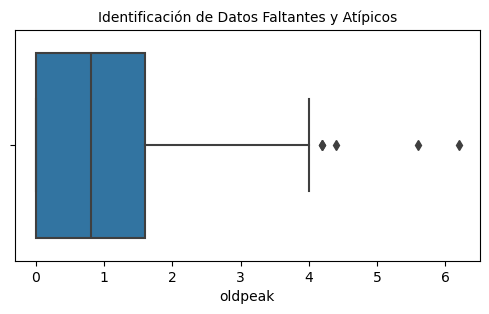

In [36]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

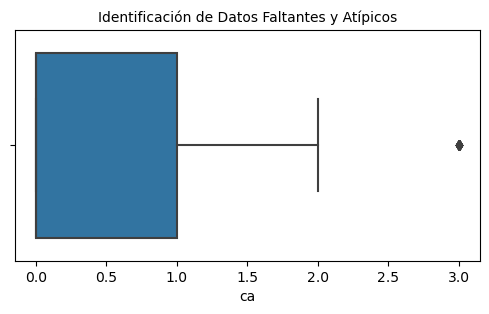

In [6]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['ca'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

In [7]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en sex: ",Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en cp: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en fbs: ",Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en restecg: ",Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en exang: ",Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en slope: ",Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en ca: ",Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en thal: ",Datos['thal'].isin([0]).sum())
print("Cantidad de Registros con cero en condition: ",Datos['condition'].isin([0]).sum())

Cantidad de Registros con cero en sex:  96
Cantidad de Registros con cero en cp:  23
Cantidad de Registros con cero en fbs:  254
Cantidad de Registros con cero en restecg:  147
Cantidad de Registros con cero en exang:  200
Cantidad de Registros con cero en oldpeak:  96
Cantidad de Registros con cero en slope:  139
Cantidad de Registros con cero en ca:  174
Cantidad de Registros con cero en thal:  164
Cantidad de Registros con cero en condition:  160


In [8]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['sex']=Datos['sex'].replace(0,Datos['sex'].mean())
Datos['cp']=Datos['cp'].replace(0,Datos['cp'].mean())
Datos['fbs']=Datos['fbs'].replace(0,Datos['fbs'].mean())
Datos['restecg']=Datos['restecg'].replace(0,Datos['restecg'].mean())
Datos['exang']=Datos['exang'].replace(0,Datos['exang'].mean())
Datos['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())
Datos['slope']=Datos['slope'].replace(0,Datos['slope'].mean())
Datos['ca']=Datos['ca'].replace(0,Datos['ca'].mean())
Datos['thal']=Datos['thal'].replace(0,Datos['thal'].mean())
Datos['condition']=Datos['condition'].replace(0,Datos['condition'].mean())

In [9]:
# Revisión nuevamente de datos faltantes

print("Cantidad de Registros con cero en sex: ",Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en cp: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en fbs: ",Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en restecg: ",Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en exang: ",Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en slope: ",Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en ca: ",Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en thal: ",Datos['thal'].isin([0]).sum())
print("Cantidad de Registros con cero en condition: ",Datos['condition'].isin([0]).sum())

Cantidad de Registros con cero en sex:  0
Cantidad de Registros con cero en cp:  0
Cantidad de Registros con cero en fbs:  0
Cantidad de Registros con cero en restecg:  0
Cantidad de Registros con cero en exang:  0
Cantidad de Registros con cero en oldpeak:  0
Cantidad de Registros con cero en slope:  0
Cantidad de Registros con cero en ca:  0
Cantidad de Registros con cero en thal:  0
Cantidad de Registros con cero en condition:  0


In [10]:
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.895521,2.325386,131.693603,247.350168,0.268601,1.489916,149.599327,0.546532,1.396745,0.884762,1.073258,1.296104,0.709780
std,9.049736,0.151434,0.735515,17.762806,51.997583,0.301442,0.502414,22.941562,0.316337,0.938977,0.362971,0.674300,0.561802,0.269005
min,29.000000,0.676768,1.000000,94.000000,126.000000,0.144781,0.996633,71.000000,0.326599,0.100000,0.602694,0.676768,0.835017,0.461279
25%,48.000000,0.676768,2.000000,120.000000,211.000000,0.144781,0.996633,133.000000,0.326599,1.000000,0.602694,0.676768,0.835017,0.461279
50%,56.000000,1.000000,2.158249,130.000000,243.000000,0.144781,1.000000,153.000000,0.326599,1.055556,1.000000,0.676768,0.835017,0.461279
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.144781,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

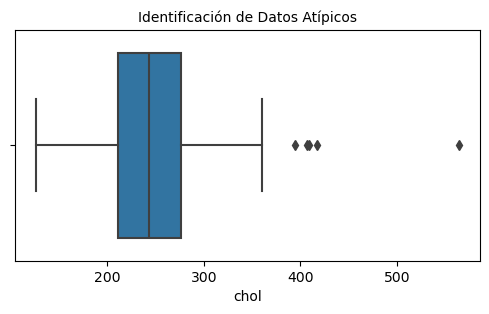

In [11]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [12]:
#Conteo de Datos Atípicos

nivel_minimo=125
nivel_maximo=250
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 127


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

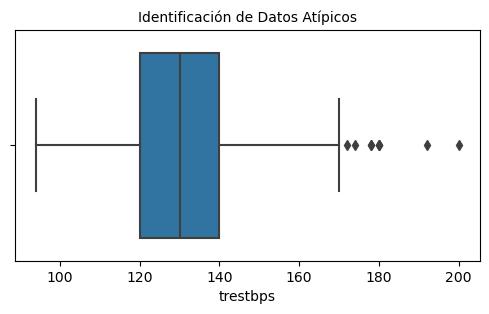

In [13]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [14]:
#Conteo de Datos Atípicos

nivel_minimo=80
nivel_maximo=200
Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [15]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['chol']<nivel_maximo)&(Datos['chol']>nivel_minimo)]
Datos=Datos[(Datos['trestbps']<nivel_maximo)&(Datos['trestbps']>nivel_minimo)]

In [16]:
# Validar si se removieron los datos atípicos

Total_Atipicos_chol =((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atípicos chol es {}".format(Total_Atipicos_chol))

Total_Atipicos_trestbps =((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos trestbps es {}".format(Total_Atipicos_trestbps))

El total de datos atípicos chol es 0
El total de datos atípicos trestbps es 0


In [17]:
# Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 14 to 295
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        48 non-null     int64  
 1   sex        48 non-null     float64
 2   cp         48 non-null     float64
 3   trestbps   48 non-null     int64  
 4   chol       48 non-null     int64  
 5   fbs        48 non-null     float64
 6   restecg    48 non-null     float64
 7   thalach    48 non-null     int64  
 8   exang      48 non-null     float64
 9   oldpeak    48 non-null     float64
 10  slope      48 non-null     float64
 11  ca         48 non-null     float64
 12  thal       48 non-null     float64
 13  condition  48 non-null     float64
dtypes: float64(10), int64(4)
memory usage: 5.6 KB


Caracteristicas:
Ataque cardiaco: si la persona sufre de ataque cardiaco o no (0 = no sufre ataque cardiado - 1 = si sufre ataque cardiaco)
Predecir si una persona puede sufrir un ataque cardiaco


In [37]:
# Total de personas con presencia de ataque cardiaco

Datos['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [38]:
Datos[['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [39]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [21]:
print (X_train)

     age       sex        cp  trestbps  chol       fbs   restecg  thalach  \
57    45  0.676768  1.000000       112   160  0.144781  0.996633      138   
295   35  0.676768  3.000000       138   183  0.144781  0.996633      182   
245   54  1.000000  3.000000       120   188  0.144781  0.996633      113   
159   68  1.000000  3.000000       144   193  1.000000  0.996633      141   
230   57  1.000000  3.000000       130   131  0.144781  0.996633      115   
279   44  1.000000  3.000000       120   169  0.144781  0.996633      144   
72    76  0.676768  2.000000       140   197  0.144781  1.000000      116   
69    35  1.000000  1.000000       122   192  0.144781  0.996633      174   
129   49  1.000000  2.000000       118   149  0.144781  2.000000      126   
105   57  1.000000  2.000000       150   126  1.000000  0.996633      173   
210   59  1.000000  3.000000       164   176  1.000000  2.000000       90   
152   39  0.676768  2.000000        94   199  0.144781  0.996633      179   

In [40]:
print (Y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


In [41]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit(X_train, Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

In [28]:
print (Y_test)

156    0.461279
22     0.461279
294    1.000000
65     0.461279
14     0.461279
291    1.000000
281    1.000000
104    0.461279
282    1.000000
146    0.461279
182    1.000000
116    0.461279
Name: condition, dtype: float64


In [42]:
print (Prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


In [43]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



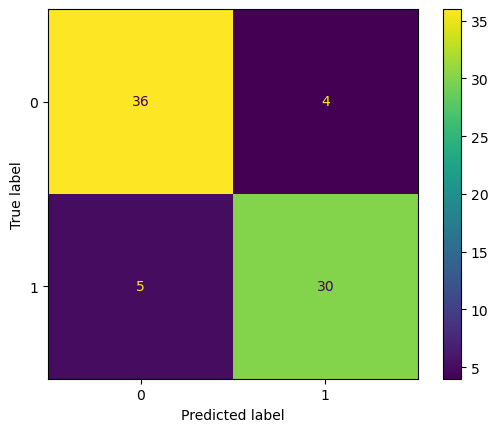

In [44]:
# Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

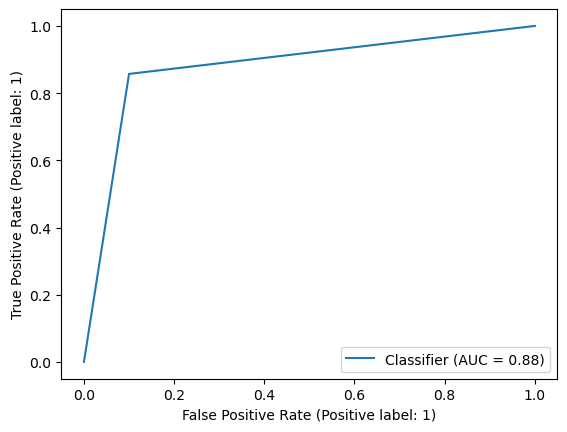

In [45]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()